# Instructor

In [1]:
# Write a function, subway, that takes lines as input (read more about the **lines notation in the instructor comments box 
# below) and returns a dictionary of the form {station:{neighbor:line, ...}, ... } 
#
# For example, when calling subway(boston), one of the entries in the resulting dictionary should be 'foresthills': {'backbay':
# 'orange'}. This means that foresthills only has one neighbor ('backbay') and that neighbor is on the orange line. Other 
# stations have more neighbors: 'state', for example, has 4 neighbors.
#
# Once you've defined your subway function, you can define a ride and longest_ride function. ride(here, there, system) takes as
# input a starting station (here), a destination station (there), and a subway system and returns the shortest path.
#
# longest_ride(system) returns the longest possible ride in a given subway system. 

import collections

def subway(**lines):                                       #使用kwargs
    """Define a subway map. Input is subway(linename='station1 station2...'...). Convert that and 
    return a dict of the form: {station:{neighbor:line,...},...}"""
    
    successors = collections.defaultdict(dict)             #讓successors是defaultdict instance
    
    for linename, stops in lines.items():                  #因為是用kwargs把lines輸入 => lines是dictionary
                                                           # linename, stops 如 Fig. 1
        for a,b in overlapping_pairs(stops.split()):       #以blue line 為例，如 Fig. 2
            
            successors[a][b] = linename                    #先把a併進successors，再把b併進a   with  linename
            successors[b][a] = linename                    #先把b併進successors，再把a併進b   with  linename (反向)
                                                           #如 Fig. 3 (只有defaultdict(dict)可以用此法)
    return successors                                      # successores包含every station 到與其相接的station(s) => 包含all網絡
                                                           #如 Fig. 6
def overlapping_pairs(items):

    return[items[i:i+2] for i in range(len(items)-1)]      #產生pairs => Ex: ['bowdoin', 'government'], ['government', 'state'].......

boston = subway(                                           # all routes including stations and their connections
    blue='bowdoin government state aquarium maverick airport suffolk revere wonderland',
    orange='oakgrove sullivan haymarket state downtown chinatown tufts backbay foresthills',
    green='lechmere science north haymarket government park copley kenmore newton riverside',
    red='alewife davis porter harvard central mit charles park downtown south umass mattapan')

def ride(here, there, system=boston):
    "Return a path on the subway system from here to there."
    
    def _next(station):                  # 找出下一站 => 找出station所連結的all stations
        
        return system[station]           # boston[station] => return後還是一個dictionary
                                         #如Fig. 4
                                         # _next()就是shortest_path_search的successors
                                        
    def _arrive(state):                  # 判斷是否已經到達there
        
        return state == there

    return shortest_path_search(here, _next, _arrive)    #用shortest_path_search來找

def longest_ride(system):
    """"Return the longest possible 'shortest path' ride between any two stops in the system."""
    
    stops = set(s for s in boston.keys())           # boston是一dictionary => 找出all keys => 設為set => 找出all stations (not repetitive)
                                                    # boston有repetitive的stations (交叉重疊)
        
    return max([ride(a,b) for a in stops for b in stops if a != b], key = len)   #有all stations後 => 排列組合 (兩兩相配) => 套入ride() => 找all paths
                                                                                 #然後用len()來找max (最長的path)
    
def shortest_path_search(start, successors, is_goal):     #與bridge problem中所使用的shortest_path_search相同
    """Find the shortest path from start state to a state such that is_goal(state) is true."""
    
    if is_goal(start):
        
        return [start]
    
    explored = set()                   # set of states we have visited
    
    frontier = [ [start] ]             # ordered list of paths we have blazed
    
    while frontier:
        
        path = frontier.pop(0)
        
        s = path[-1]
        
        for (state, action) in successors(s).items():
            
            if state not in explored:
                
                explored.add(state)
                
                path2 = path + [action, state]
                
                if is_goal(state):
                    
                    return path2
                
                else:
                    
                    frontier.append(path2)
                    
    return []

def path_states(path):    
    "Return a list of states in this path."
    
    return path[0::2]
    
def path_actions(path):    
    "Return a list of actions in this path."
    
    return path[1::2]

print (ride('mit', 'government') == ['mit', 'red', 'charles', 'red', 'park', 'green', 'government'])

print (ride('mattapan', 'foresthills') == ['mattapan', 'red', 'umass', 'red', 'south', 'red', 'downtown',
        'orange', 'chinatown', 'orange', 'tufts', 'orange', 'backbay', 'orange', 'foresthills'])

print (ride('newton', 'alewife') == ['newton', 'green', 'kenmore', 'green', 'copley', 'green', 'park', 'red', 'charles', 
        'red', 'mit', 'red', 'central', 'red', 'harvard', 'red', 'porter', 'red', 'davis', 'red', 'alewife'])

print (path_states(longest_ride(boston)) == 
       ['wonderland', 'revere', 'suffolk', 'airport', 'maverick', 'aquarium', 'state', 'downtown', 'park', 'charles', 'mit', 'central', 'harvard', 'porter', 'davis', 'alewife'] or  
       [ 'alewife', 'davis', 'porter', 'harvard', 'central', 'mit', 'charles', 'park', 'downtown', 'state', 'aquarium', 'maverick', 'airport', 'suffolk', 'revere', 'wonderland'])

print (len(path_states(longest_ride(boston))) == 16)


%timeit ride('wonderland', 'alewife')
%timeit path_states(longest_ride(boston))

True
True
True
['alewife', 'davis', 'porter', 'harvard', 'central', 'mit', 'charles', 'park', 'downtown', 'state', 'aquarium', 'maverick', 'airport', 'suffolk', 'revere', 'wonderland']
True
60.7 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
38.6 ms ± 4.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


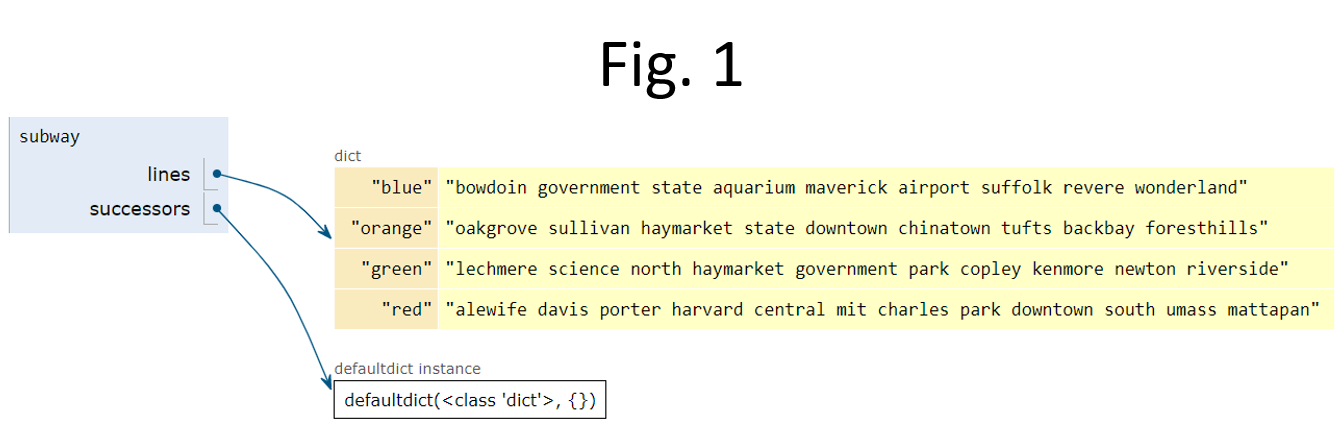

In [2]:
from IPython.display import Image

Image("Desktop\Fig_1.png")

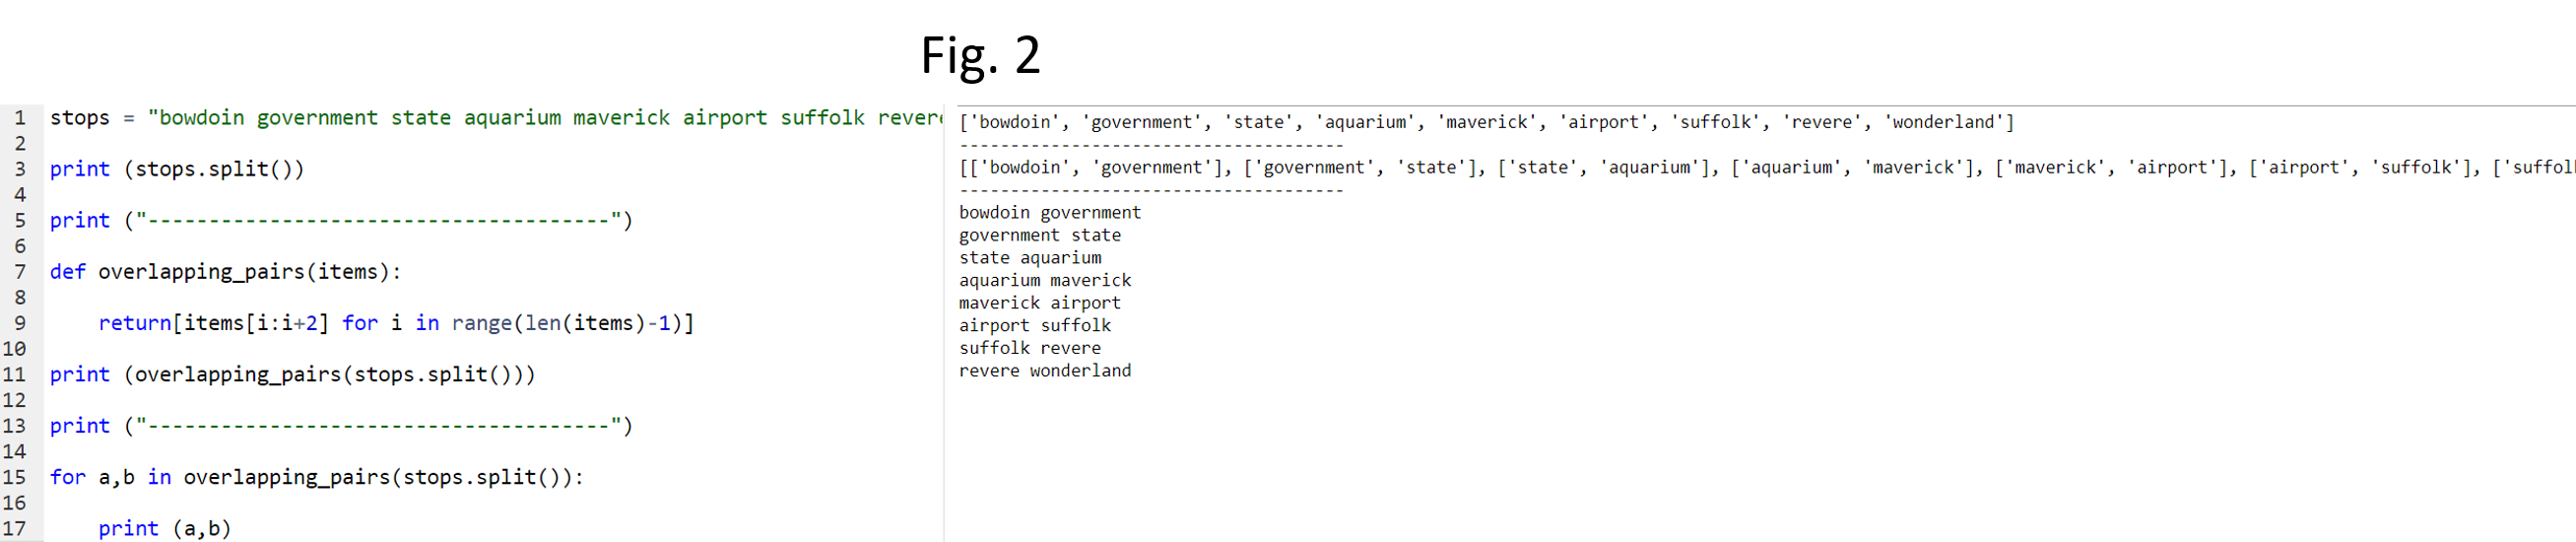

In [3]:
from IPython.display import Image

Image("Desktop\Fig_2.png")

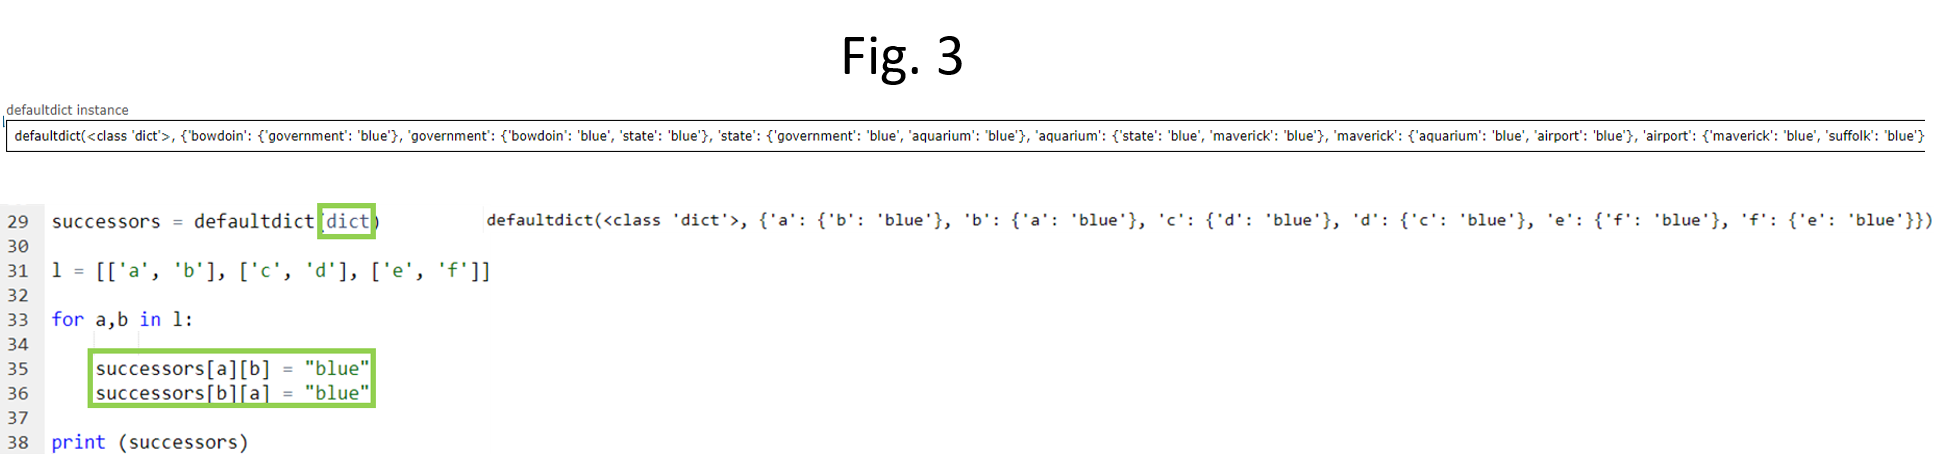

In [4]:
from IPython.display import Image

Image("Desktop\Fig_5.png")

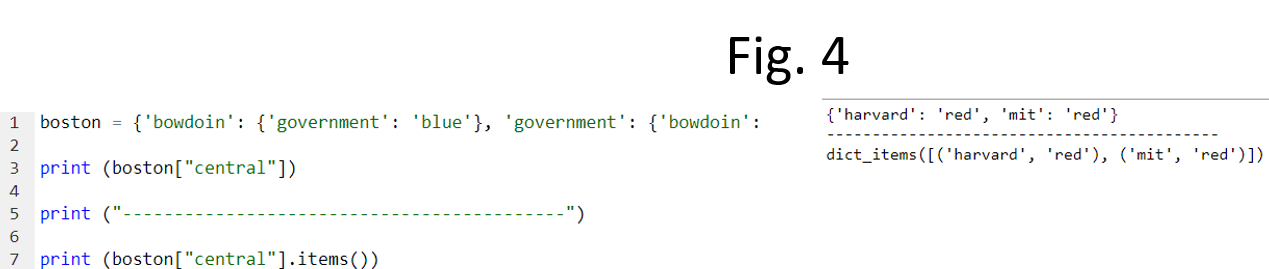

In [2]:
from IPython.display import Image

Image("Desktop\Fig_6.png")

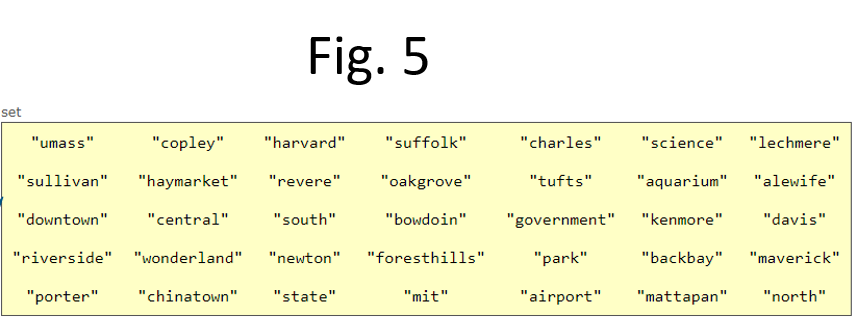

In [6]:
from IPython.display import Image

Image("Desktop\Fig_9.png")

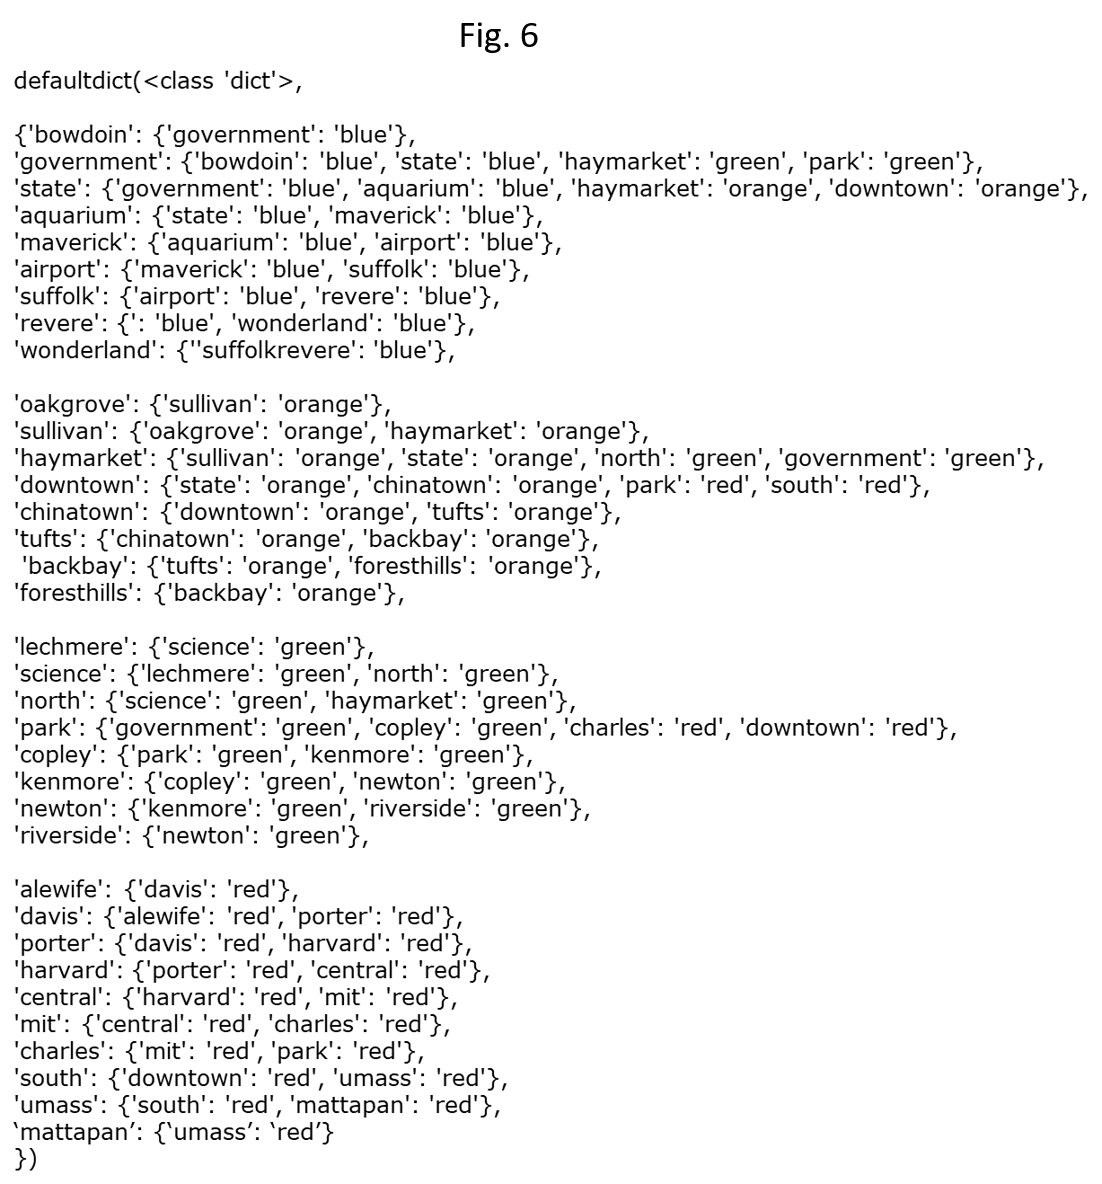

In [3]:
from IPython.display import Image

Image("Desktop\Fig_11.png")

In [28]:
stops = set(s for s in boston.keys())

print (len([ride(a,b) for a in stops for b in stops if a != b]))   #總共有1190 routes

[ride(a,b) for a in stops for b in stops if a != b]


1190


[['charles', 'red', 'park', 'green', 'government', 'blue', 'bowdoin'],
 ['charles',
  'red',
  'mit',
  'red',
  'central',
  'red',
  'harvard',
  'red',
  'porter',
  'red',
  'davis',
  'red',
  'alewife'],
 ['charles',
  'red',
  'park',
  'green',
  'government',
  'blue',
  'state',
  'blue',
  'aquarium'],
 ['charles', 'red', 'park', 'red', 'downtown', 'red', 'south'],
 ['charles',
  'red',
  'park',
  'green',
  'government',
  'blue',
  'state',
  'blue',
  'aquarium',
  'blue',
  'maverick',
  'blue',
  'airport'],
 ['charles', 'red', 'park', 'red', 'downtown', 'red', 'south', 'red', 'umass'],
 ['charles', 'red', 'park', 'green', 'copley'],
 ['charles', 'red', 'mit'],
 ['charles',
  'red',
  'park',
  'green',
  'government',
  'blue',
  'state',
  'blue',
  'aquarium',
  'blue',
  'maverick'],
 ['charles', 'red', 'mit', 'red', 'central', 'red', 'harvard'],
 ['charles',
  'red',
  'park',
  'green',
  'copley',
  'green',
  'kenmore',
  'green',
  'newton'],
 ['charles', 'red